In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [186]:
#1.lodi the dataset into python environment
#2.make 'passengerId' as the index column

In [187]:
data=pd.read_csv(r"D:\ICT Academy\data set for missing values and outlier session\titanic_dataset.csv",index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
#3.check the basic dtails of the dataset

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [190]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [191]:
#4.fill in all the missing values preseent in all the columns in the dataset

In [192]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [193]:
#droping the cabin value, as the null value for cabin is very high and it does not make any sense

In [194]:
data1=data.drop('Cabin',axis=1)
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


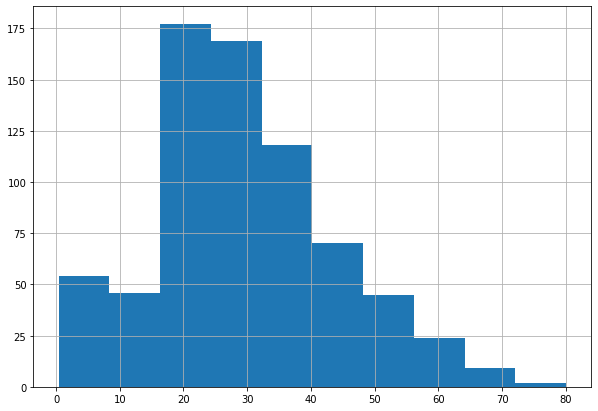

In [195]:
freqgraph=data1['Age']
freqgraph.hist(figsize=(10,7))
plt.show()

In [196]:
#the data is left skewed so it would be better to fill with the median value

In [197]:
for col in ['Age']:
    data1[col]=data1[col].fillna(data1[col].median())
data1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [198]:
data1.loc[data['Embarked'].isnull()].index

Int64Index([62, 830], dtype='int64', name='PassengerId')

In [199]:
data1.drop([62, 830],inplace=True)
data1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [200]:
#we have handled the missing values present in the dataset
#we have removed the high and low missing value from dataset
#we have filled the missing value with the corresponding median of the column after checking the skew

In [201]:
#5.check and handle outlier in at least 3 columns in the dataset

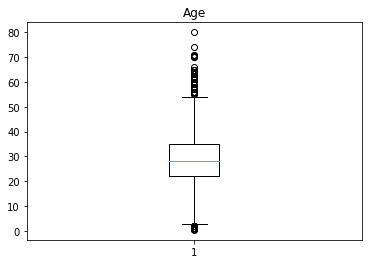

In [226]:
plt.boxplot(data1['Age'])
plt.title('Age')
plt.show()

In [203]:
#outlier are present

In [227]:
QA1=np.percentile(data1['Age'],25,interpolation='midpoint')
QA2=np.percentile(data1['Age'],50,interpolation='midpoint')
QA3=np.percentile(data1['Age'],75,interpolation='midpoint')
print(QA1)
print(QA2)
print(QA3)
IQR_a=QA3-QA1
print("IQR=",IQR_a)
low_lim_a=QA1-1.5*IQR_a
upper_lim_a=QA3+1.5*IQR_a
print('Lower Limit',low_lim_a)
print('Upper Limit',upper_lim_a)
print()
outlier=[]
for i in data1['Age']:
    if(i<low_lim_a) or (i>upper_lim_a):
        outlier.append(i)
print("The outlier values are")
print(outlier)


22.0
28.0
35.0
IQR= 13.0
Lower Limit 2.5
Upper Limit 54.5

The outlier values are
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 0.83, 74.0, 56.0]


C:\Users\chris\AppData\Local\Temp\ipykernel_2848\3678398443.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  QA1=np.percentile(data1['Age'],25,interpolation='midpoint')
C:\Users\chris\AppData\Local\Temp\ipykernel_2848\3678398443.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  QA2=np.percentile(data1['Age'],50,interpolation='midpoint')
C:\Users\chris\AppData\Local\Temp\ipykernel_2848\3678398443.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoin

In [228]:
ind_a1=data1['Age']>54.5
ind_a2=data1['Age']<2.5
outl_a1=data1.loc[ind_a1].index
outl_a2=data1.loc[ind_a2].index


In [229]:
data_preprocessed=data1.drop(outl_a1)
data_preprocessed=data_preprocessed.drop(outl_a2)
print('Data after removing the age outliers')
data_preprocessed

Data after removing the age outliers


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


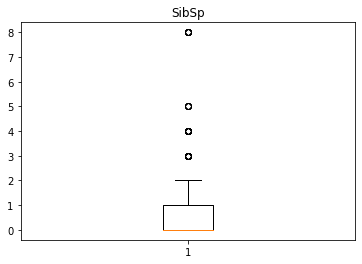

In [230]:
plt.boxplot(data1['SibSp'])
plt.title('SibSp')
plt.show()

In [243]:
QS1=np.percentile(data1['SibSp'],25,interpolation='midpoint')
QS2=np.percentile(data1['SibSp'],50,interpolation='midpoint')
QS3=np.percentile(data1['SibSp'],75,interpolation='midpoint')
print(QS1)
print(QS2)
print(QS3)
IQR_s=QS3-QS1
print("IQR=",IQR_s)
low_lim_s=QS1-1.5*IQR_s
upper_lim_s=QS3+1.5*IQR_s
print('Lower Limit',low_lim_s)
print('Upper Limit',upper_lim_s)
print()
outlier=[]
for i in data1['SibSp']:
    if(i<low_lim_s) or (i>upper_lim_s):
        outlier.append(i)
print("The outlier values are")
print(outlier)


0.0
0.0
1.0
IQR= 1.0
Lower Limit -1.5
Upper Limit 2.5

The outlier values are
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


C:\Users\chris\AppData\Local\Temp\ipykernel_2848\3782794630.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  QS1=np.percentile(data1['SibSp'],25,interpolation='midpoint')
C:\Users\chris\AppData\Local\Temp\ipykernel_2848\3782794630.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  QS2=np.percentile(data1['SibSp'],50,interpolation='midpoint')
C:\Users\chris\AppData\Local\Temp\ipykernel_2848\3782794630.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'mid

In [244]:
ind_s=data_preprocessed['SibSp']>2.5
outl_s=data_preprocessed.loc[ind_s].index


In [245]:
data_preprocessed=data_preprocessed.drop(outl_s)
print('Data after removing Sibsp outliers')
data_preprocessed

Data after removing Sibsp outliers


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


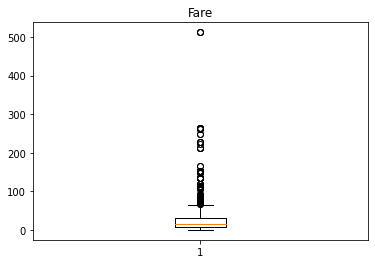

In [246]:
plt.boxplot(data1['Fare'])
plt.title('Fare')
plt.show()

In [250]:
QF1=np.percentile(data1['Fare'],25,interpolation='midpoint')
QF2=np.percentile(data1['Fare'],50,interpolation='midpoint')
QF3=np.percentile(data1['Fare'],75,interpolation='midpoint')
print(QF1)
print(QF2)
print(QF3)
IQR_f=QF3-QF1
print("IQR=",IQR_f)
low_lim_f=QF1-1.5*IQR_f
upper_lim_f=QF3+1.5*IQR_f
print('Lower Limit',low_lim_f)
print('Upper Limit',upper_lim_f)
print()
outlier=[]
for i in data1['Fare']:
    if(i<low_lim_f) or (i>upper_lim_f):
        outlier.append(i)
print("The outlier values are")
print(outlier)


7.8958
14.4542
31.0
IQR= 23.1042
Lower Limit -26.7605
Upper Limit 65.6563

The outlier values are
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89.1042, 164.8667, 

C:\Users\chris\AppData\Local\Temp\ipykernel_2848\3107059405.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  QF1=np.percentile(data1['Fare'],25,interpolation='midpoint')
C:\Users\chris\AppData\Local\Temp\ipykernel_2848\3107059405.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  QF2=np.percentile(data1['Fare'],50,interpolation='midpoint')
C:\Users\chris\AppData\Local\Temp\ipykernel_2848\3107059405.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpo

In [251]:
ind_f=data_preprocessed['Fare']>65.6563
outl_f=data_preprocessed.loc[ind_f].index

In [253]:
data_preprocessed=data_preprocessed.drop(outl_f)
print("Data after removing the fare outliers")
data_preprocessed

Data after removing the fare outliers


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [254]:
print('data after removing the outliers of the three columns')
data_preprocessed

data after removing the outliers of the three columns


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [119]:
#5.do min max scaling on the feature set(take 'survived as target')

In [255]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [256]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [257]:
data2=data1.drop(['Name', 'Sex','Ticket','Embarked'],axis=1)
data2

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,28.0,1,2,23.4500


In [258]:
x=data2.drop(('Survived'),axis=1)
y=data2['Survived']

In [259]:
from sklearn.model_selection import train_test_split


In [260]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [261]:
from sklearn.linear_model import LinearRegression

In [262]:
lin_reg=LinearRegression()
model=lin_reg.fit(x_train,y_train)
predictions=model.predict(x_test)

In [263]:
#evalution part

In [264]:
from sklearn.metrics import mean_squared_error,r2_score

In [265]:
print('The mean squared error value is',mean_squared_error(y_test,predictions))
print('The r squared value is',r2_score(y_test,predictions))

The mean squared error value is 0.19672936316367737
The r squared value is 0.17123080142561464


In [266]:
#min max scaling

In [267]:
x.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


In [268]:
from sklearn import preprocessing

In [269]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max_scaler.fit_transform(x)

In [270]:
type(x)

numpy.ndarray

In [271]:
x

array([[1.        , 0.27117366, 0.125     , 0.        , 0.01415106],
       [0.        , 0.4722292 , 0.125     , 0.        , 0.13913574],
       [1.        , 0.32143755, 0.        , 0.        , 0.01546857],
       ...,
       [1.        , 0.34656949, 0.125     , 0.33333333, 0.04577135],
       [0.        , 0.32143755, 0.        , 0.        , 0.0585561 ],
       [1.        , 0.39683338, 0.        , 0.        , 0.01512699]])

In [272]:
x=pd.DataFrame(x,columns=['Pclass','Age','SibSp','Parch','Fare'])

In [273]:
x.head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.0,0.014151
1,0.0,0.472229,0.125,0.0,0.139136
2,1.0,0.321438,0.000,0.0,0.015469
3,0.0,0.434531,0.125,0.0,0.103644
4,1.0,0.434531,0.000,0.0,0.015713


In [274]:
data3=data1.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],axis=1)

In [275]:
data4=pd.concat([data3,x],axis=1)
data4.head()


,Survived,Name,Sex,Ticket,Embarked,Pclass,Age,SibSp,Parch,Fare
1,0.0,"Braund, Mr. Owen Harris",male,A/5 21171,S,0.0,0.472229,0.125,0.0,0.139136
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,1.0,0.321438,0.000,0.0,0.015469
3,1.0,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,0.0,0.434531,0.125,0.0,0.103644
4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,1.0,0.434531,0.000,0.0,0.015713
5,0.0,"Allen, Mr. William Henry",male,373450,S,1.0,0.346569,0.000,0.0,0.016510


In [276]:
type(x)

pandas.core.frame.DataFrame

In [277]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.655793,0.363096,0.065523,0.063742,0.062649
std,0.417350,0.163168,0.137963,0.134460,0.097003
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015412
50%,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [278]:
#scalling making use of preprocessed data set

In [279]:
data_preprocessed.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q


In [280]:
data_preprocessed.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [281]:
data_preprocessed_2=data_preprocessed.drop(['Name', 'Sex','Ticket','Embarked'],axis=1)
data_preprocessed_2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,28.0,0,0,8.4583


In [282]:
x1=data_preprocessed_2.drop(('Survived'),axis=1)
y1=data_preprocessed_2['Survived']

In [283]:
from sklearn.model_selection import train_test_split


In [284]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)

In [285]:
from sklearn.linear_model import LinearRegression

In [286]:
lin_reg=LinearRegression()
model=lin_reg.fit(x1_train,y1_train)
predictions=model.predict(x1_test)

In [287]:
from sklearn.metrics import mean_squared_error,r2_score

In [288]:
print('The mean squared error value is',mean_squared_error(y1_test,predictions))
print('The r squared value is',r2_score(y1_test,predictions))

The mean squared error value is 0.19316551270925997
The r squared value is 0.14556985552756108


In [289]:
from sklearn import preprocessing

In [290]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
x1=min_max_scaler.fit_transform(x1)

In [291]:
x1=pd.DataFrame(x1,columns=['Pclass','Age','SibSp','Parch','Fare'])
x1.head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.372549,0.5,0.0,0.111538
1,1.0,0.450980,0.0,0.0,0.121923
2,0.0,0.627451,0.5,0.0,0.816923
3,1.0,0.627451,0.0,0.0,0.123846
4,1.0,0.490196,0.0,0.0,0.130128


In [292]:
x1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,692.000000,692.000000,692.000000,692.000000,692.000000
mean,0.744942,0.504392,0.137283,0.046002,0.259055
std,0.362361,0.187389,0.250782,0.126533,0.206727
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.000000,0.120834
50%,1.000000,0.490196,0.000000,0.000000,0.161538
75%,1.000000,0.588235,0.000000,0.000000,0.369808
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [293]:
data5=pd.concat([data3,x1],axis=1)
data5.head()

,Survived,Name,Sex,Ticket,Embarked,Pclass,Age,SibSp,Parch,Fare
1,0.0,"Braund, Mr. Owen Harris",male,A/5 21171,S,1.0,0.450980,0.0,0.0,0.121923
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,0.0,0.627451,0.5,0.0,0.816923
3,1.0,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,1.0,0.627451,0.0,0.0,0.123846
4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,1.0,0.490196,0.0,0.0,0.130128
5,0.0,"Allen, Mr. William Henry",male,373450,S,0.0,1.000000,0.0,0.0,0.797885
